<a href="https://colab.research.google.com/github/OmarAhmed03/PDE-BS_MODEL/blob/main/Modelling_and_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import import libraries

### tensorflow for the AI module

In [ ]:
import tensorflow as tf

In [ ]:
import pandas as pd #pandas for data manipulation
import numpy as np #numpy for mathematical operations
from sklearn.model_selection import train_test_split #for splitting dataset to train and test
import seaborn as sns #seaborn for data visualization
import matplotlib.pyplot as plt

# the black sholes analytical solution

In [ ]:
import numpy as np
from scipy.stats import norm
def black_scholes_analytic(S, K, T, r, sigma, option_type='call'):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == 'call':
        option_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        option_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")

    return option_price

# importing the data

the dataset is in excel format

In [ ]:
dataset = pd.read_excel("cleaned data3.xlsx")

In [ ]:
data = dataset
data.head()

,Unnamed: 0,contractSymbol,lastTradeDate,strike,lastPrice,impliedVolatility,expiry_date,symbol,dates diff,Stock price
0,0,PFE231215C00017500,2023-12-13,17.5,9.10,0.000010,2023-12-15,PFE,2,26.660000
1,1,PFE231215C00019000,2023-09-25,19.0,13.90,11.316409,2023-12-15,PFE,81,32.541264
2,2,PFE231215C00020000,2023-12-13,20.0,6.32,0.000010,2023-12-15,PFE,2,26.660000
3,3,PFE231215C00021000,2023-12-13,21.0,5.65,0.000010,2023-12-15,PFE,2,26.660000
4,4,PFE231215C00022500,2023-12-13,22.5,4.12,0.000010,2023-12-15,PFE,2,26.660000


removing the extra column

In [ ]:
data = data.iloc[:,1:]
data.head()

,contractSymbol,lastTradeDate,strike,lastPrice,impliedVolatility,expiry_date,symbol,dates diff,Stock price
0,PFE231215C00017500,2023-12-13,17.5,9.10,0.000010,2023-12-15,PFE,2,26.660000
1,PFE231215C00019000,2023-09-25,19.0,13.90,11.316409,2023-12-15,PFE,81,32.541264
2,PFE231215C00020000,2023-12-13,20.0,6.32,0.000010,2023-12-15,PFE,2,26.660000
3,PFE231215C00021000,2023-12-13,21.0,5.65,0.000010,2023-12-15,PFE,2,26.660000
4,PFE231215C00022500,2023-12-13,22.5,4.12,0.000010,2023-12-15,PFE,2,26.660000


information abou the data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35727 entries, 0 to 35726
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   contractSymbol     35727 non-null  object        
 1   lastTradeDate      35727 non-null  datetime64[ns]
 2   strike             35727 non-null  float64       
 3   lastPrice          35727 non-null  float64       
 4   impliedVolatility  35727 non-null  float64       
 5   expiry_date        35727 non-null  datetime64[ns]
 6   symbol             35727 non-null  object        
 7   dates diff         35727 non-null  int64         
 8   Stock price        35727 non-null  float64       
dtypes: datetime64[ns](2), float64(4), int64(1), object(2)
memory usage: 2.5+ MB


descriptive statistics about the data

In [ ]:
data.describe()

,strike,lastPrice,impliedVolatility,dates diff,Stock price
count,35727.000000,35727.000000,35727.000000,35727.000000,35727.000000
mean,163.558230,33.963996,0.165873,187.674280,115.886382
std,380.722103,100.049276,0.697095,234.796544,135.571782
min,0.350000,0.010000,0.000000,2.000000,0.860300
25%,20.000000,0.440000,0.000010,23.000000,19.219999
50%,50.000000,4.400000,0.000010,65.000000,49.340000
75%,155.000000,20.150000,0.125009,262.000000,148.839996
max,5400.000000,1499.750000,39.875004,967.000000,504.045685


selecting data with implied volatility <= 1 and option price < 400<br>
as this ranges represents outliers and we don't want to give the model to train with them

In [ ]:
data = data[ (data["lastPrice"] < 400) & (data['impliedVolatility'] <= 1)]

the new data count is 34480 whic means ther was 1247 outlier about 3.5% of the full dataset

In [ ]:
data.count()

contractSymbol       34480
lastTradeDate        34480
strike               34480
lastPrice            34480
impliedVolatility    34480
expiry_date          34480
symbol               34480
dates diff           34480
Stock price          34480
dtype: int64

# Feauture selection




This is a heatmap which visualizes the correlation between different parameters <br>which shows that the option price is mostly correlated with strike price, stock price, dates diff

<ipython-input-11-8189d39fa236>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


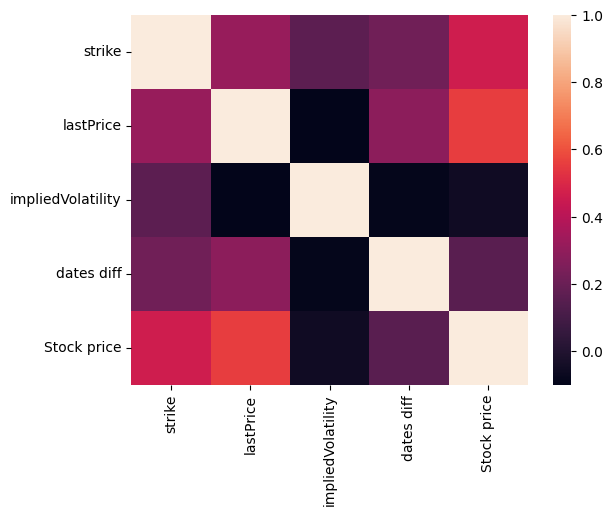

In [ ]:
corr = data.corr()

sns.heatmap(corr)
plt.show()

* Splitting data to inputs, outputs
* X: inputs whicha are strike price,dates diff,stock price

In [ ]:
X = dataset[['strike','dates diff','Stock price','impliedVolatility']]
Y = dataset['lastPrice']

# Data normalization
*   data is normalized according to **z-score **
*   z-score = ( x - mean(x) )/ std(x))
*   normaliztion is done to simplify the calculations and eliminiate outliers effect

In [ ]:
meanx = np.mean(X)
meany = np.mean(Y)
stdx = np.std(X)
stdy = np.std(Y)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [ ]:
X = (X - np.mean(X))/np.std(X)
Y = (Y - np.mean(Y))/np.std(Y)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


this is how normalized data look like

In [ ]:
X

,strike,dates diff,Stock price,impliedVolatility
0,-0.383640,-0.790799,-0.658158,-0.237938
1,-0.379700,-0.454333,-0.614776,15.995943
2,-0.377074,-0.790799,-0.658158,-0.237938
3,-0.374447,-0.790799,-0.658158,-0.237938
4,-0.370507,-0.790799,-0.658158,-0.237938
...,...,...,...,...
35722,-0.324541,2.458868,-0.585502,-0.215524
35723,-0.319288,2.458868,-0.585502,-0.193109
35724,-0.311408,2.463127,-0.588305,-0.193109
35725,-0.306155,2.463127,-0.588305,-0.193109


**descriptive stats for the normalized x**

In [ ]:
X.describe()

,strike,dates diff,Stock price,impliedVolatility
count,3.572700e+04,3.572700e+04,3.572700e+04,3.572700e+04
mean,-4.136728e-17,6.364197e-18,3.182099e-18,3.261651e-17
std,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00
min,-4.286867e-01,-7.907990e-01,-8.484634e-01,-2.379525e-01
25%,-3.770736e-01,-7.013586e-01,-7.130373e-01,-2.379381e-01
50%,-2.982748e-01,-5.224779e-01,-4.908640e-01,-2.379381e-01
75%,-2.247926e-02,3.165582e-01,2.430747e-01,-5.862184e-02
max,1.375417e+01,3.319200e+00,2.863168e+00,5.696452e+01


# data splitting to train and test

*   20% of data is for test 80% for train
*   data is shuffled to avoid patterns



In [ ]:
X_train,X_test ,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

## The AI Model


*  the model is ANN Deep learning model
*   model consists of 5 dense layers as shown in code
*   after the first layer a dropout layer is added to decrease the effect of overfitting
*   hidden layers has **relu** activation  and nuerons number as shown in code for each layer and output layer has linear activation as it is a regression model




In [ ]:
model = tf.keras.Sequential([

    tf.keras.layers.Dense(128, activation='relu', input_shape=(4,)),
    #tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    #tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])



*   model uses ADAM optimizer and MSE error loss
*   the model has a callback that stops learning if the validation loss doesn't change after 10 iterations



In [ ]:
model.compile(optimizer='adam', loss='mse')

In [ ]:
cb = tf.keras.callbacks.EarlyStopping(patience=10,monitor='val_loss')

model is trained with train data and 1000 iterations 32 batch size and validition step is done with validation data of 30% of the train data

In [ ]:
model.fit(X_train,y_train,epochs=1000,validation_split=0.3,callbacks=cb,batch_size = 32)

Epoch 1/1000
626/626 [==============================] - 3s 4ms/step - loss: 0.2971 - val_loss: 0.1431
Epoch 2/1000
626/626 [==============================] - 3s 5ms/step - loss: 0.1250 - val_loss: 0.1169
Epoch 3/1000
626/626 [==============================] - 3s 4ms/step - loss: 0.1060 - val_loss: 0.1018
Epoch 4/1000
626/626 [==============================] - 2s 3ms/step - loss: 0.0902 - val_loss: 0.0805
Epoch 5/1000
626/626 [==============================] - 2s 4ms/step - loss: 0.0740 - val_loss: 0.0928
Epoch 6/1000
626/626 [==============================] - 2s 3ms/step - loss: 0.0691 - val_loss: 0.0817
Epoch 7/1000
626/626 [==============================] - 2s 3ms/step - loss: 0.0596 - val_loss: 0.0604
Epoch 8/1000
626/626 [==============================] - 2s 3ms/step - loss: 0.0518 - val_loss: 0.0584
Epoch 9/1000
626/626 [==============================] - 3s 5ms/step - loss: 0.0436 - val_loss: 0.0376
Epoch 10/1000
626/626 [==============================] - 2s 3ms/step - loss: 0.036

evaluation of model at test data which shows a very low MSE

In [ ]:
model.evaluate(X_test,y_test,verbose = 0)

0.007921420969069004

## Evaluation of the model and results

get the output for the test data from the model

In [ ]:
y_predict = model.predict(X_test)

224/224 [==============================] - 0s 1ms/step


import from sklearn the needed metrics

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,mean_squared_log_error

Customize data for the plot

In [ ]:
x1 = np.array(X_test['Stock price'])
y1 = np.array(X_test['dates diff'])
z1_real = np.array(y_test)
z1_predict = np.array(y_predict)

Plot that compares Actual price with th Ai price before normalization

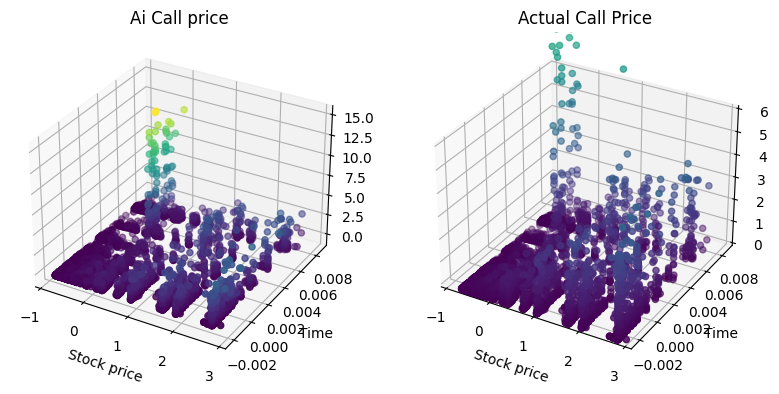

In [ ]:
# importing required libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(x1, y1/365, z1_predict,c=z1_predict)
plt.xlabel('Stock price')
plt.ylabel('Time')
plt.title('Ai Call price')

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter(x1, y1/365, z1_real,c=z1_real)
ax.set_zlim(0,6)
plt.xlabel('Stock price')
plt.ylabel('Time')
plt.title('Actual Call Price')

plt.show()

Denormalize the data

In [ ]:
X_test = (X_test * stdx) + meanx
y_test = (y_test * stdy) + meany
y_predict = (y_predict * stdy) + meany

In [ ]:
x1 = np.array(X_test['Stock price'])
y1 = np.array(X_test['dates diff'])
z1_real = np.array(y_test)
z1_predict = np.array(y_predict)

getting the data from BS solution

In [ ]:
y_bs = black_scholes_analytic(x1,X_test['strike'],y1/365,0.05,X_test['impliedVolatility'])

Plot of BS,Ai, Actual solution

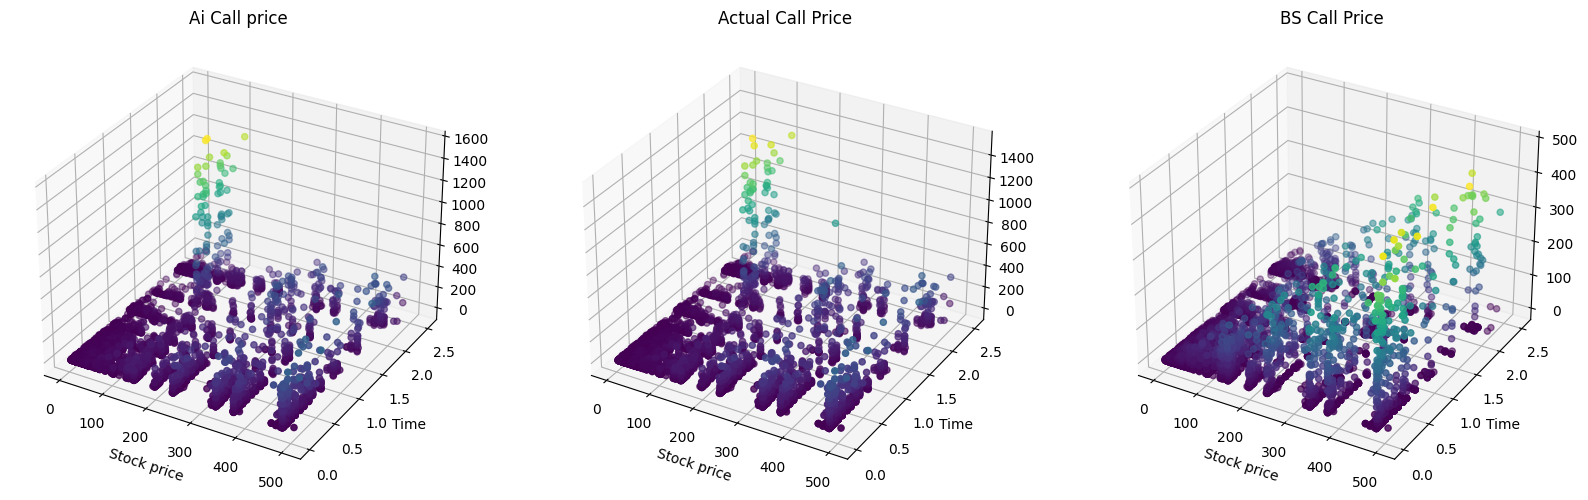

In [ ]:
# importing required libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,20))

ax = fig.add_subplot(2, 3, 1, projection='3d')
ax.scatter(x1, y1/365, z1_predict,c=z1_predict)
plt.xlabel('Stock price')
#plt.xlim(0,200)
plt.ylabel('Time')
plt.title('Ai Call price')

ax = fig.add_subplot(2, 3, 2, projection='3d')
ax.scatter(x1, y1/365, z1_real,c=z1_real)
plt.xlabel('Stock price')
#plt.xlim(0,200)
plt.ylabel('Time')
plt.title('Actual Call Price')

ax = fig.add_subplot(2, 3, 3, projection='3d')
ax.scatter(x1, y1/365, y_bs,c=y_bs)
plt.xlabel('Stock price')
#plt.xlim(0,200)
plt.ylabel('Time')
plt.title('BS Call Price')

plt.show()

Error metrics of the BS solution

In [ ]:
mse_bs = mean_squared_error(z1_real,y_bs)
mae_bs = mean_absolute_error(z1_real,y_bs)
mape_bs = mean_absolute_percentage_error(z1_real,y_bs)
#msle = mean_squared_log_error(y_real,y_predict1)
mse_bs

7579.480720193754

Error metrics of the Ai solution

In [ ]:
mse_ai = mean_squared_error(z1_real,z1_predict)
mae_ai = mean_absolute_error(z1_real,z1_predict)
mape_ai = mean_absolute_percentage_error(z1_real,z1_predict)
#msle = mean_squared_log_error(y_real,y_predict1)
mse_ai

79.29009530175931

In [ ]:
metrics_dict = {
    "Metrics" : ["BS solution","Ai solution"],
    'Mean Squared Error': [mse_bs , mse_ai],
    'Mean Absolute Error': [mae_bs,mae_ai],
    'Mean Absolute Percentage Error': [mape_bs,mape_ai]
}

metrics_df = pd.DataFrame.from_dict(metrics_dict)
metrics_df

,Metrics,Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error
0,BS solution,7579.480720,13.667211,4.475546
1,Ai solution,79.290095,2.394964,6.054098


# Generalizing the code

## Normalizing dataset function

In [ ]:
def normalize_zscore(X,Y):
    meanx = np.mean(X)
    meany = np.mean(Y)
    stdx = np.std(X)
    stdy = np.std(Y)

    X = (X - np.mean(X))/np.std(X)
    Y = (Y - np.mean(Y))/np.std(Y)
    return X,Y

## getting plot data function

In [ ]:
def get_outputs(X_test,y_test):
    y_predict = model.predict(X_test)

    X_test = (X_test * stdx) + meanx
    y_test = (y_test * stdy) + meany
    y_predict = (y_predict * stdy) + meany

    x1 = np.array(X_test['Stock price'])
    y1 = np.array(X_test['dates diff'])
    z1_real = np.array(y_test)
    z1_predict = np.array(y_predict)
    z_bs = black_scholes_analytic(x1,X_test['strike'],y1/365,0.05,X_test['impliedVolatility'])
    return x1,y1,z1_real,z1_predict,z_bs



## plot function

In [ ]:
def plot_3d_3models(x,y,z_real,z_predicted,z_bs):
    fig = plt.figure(figsize=(20,20))

    ax = fig.add_subplot(2, 3, 1, projection='3d')
    ax.scatter(x, y/365, z_predicted,c=z_predicted)
    ax.set_zlim(0,500)
    plt.xlabel('Stock price')
    #plt.xlim(0,200)
    plt.ylabel('Time')
    plt.title('Ai Call price')

    ax = fig.add_subplot(2, 3, 2, projection='3d')
    ax.scatter(x, y/365, z_real,c=z_real)
    ax.set_zlim(0,500)
    plt.xlabel('Stock price')
    #plt.xlim(0,200)
    plt.ylabel('Time')
    plt.title('Actual Call Price')

    ax = fig.add_subplot(2, 3, 3, projection='3d')
    ax.scatter(x, y/365, z_bs,c=z_bs)
    ax.set_zlim(0,500)
    plt.xlabel('Stock price')
    #plt.xlim(0,200)
    plt.ylabel('Time')
    plt.title('BS Call Price')
    plt.show()


## Error Metrics Function

In [ ]:
def get_errors(z_real,z_bs,z_predicted):
  mse_bs = mean_squared_error(z_real,z_bs)
  mae_bs = mean_absolute_error(z_real,z_bs)
  mape_bs = mean_absolute_percentage_error(z_real,z_bs)
  #msle = mean_squared_log_error(y_real,y_predict1)

  mse_ai = mean_squared_error(z_real,z_predicted)
  mae_ai = mean_absolute_error(z_real,z_predicted)
  mape_ai = mean_absolute_percentage_error(z_real,z_predicted)
  #msle = mean_squared_log_error(y_real,y_predict1)

  metrics_dict = {
      "Metrics" : ["BS solution","Ai solution"],
      'Mean Squared Error': [mse_bs , mse_ai],
      'Mean Absolute Error': [mae_bs,mae_ai],
      'Mean Absolute Percentage Error': [mape_bs,mape_ai]
  }

  metrics_df = pd.DataFrame.from_dict(metrics_dict)
  return metrics_df

Testing the full dataset

In [ ]:
X = dataset[['strike','dates diff','Stock price','impliedVolatility']]
Y = dataset['lastPrice']

In [ ]:
X,Y = normalize_zscore(X,Y)
x,y,z_real,z_predict,z_bs = get_outputs(X,Y)

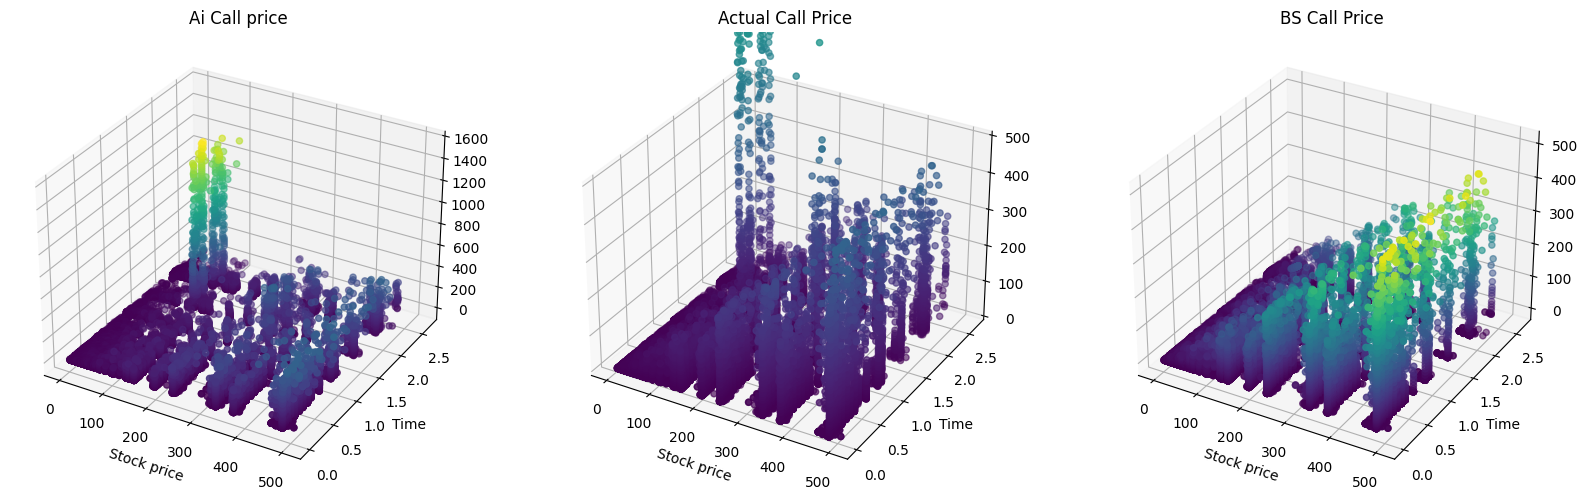

In [ ]:
plot_3d_3models(x,y,z_real,z_predict,z_bs)

In [ ]:
get_errors(z_real,z_bs,z_predict)

,Metrics,Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error
0,BS solution,7657.621653,13.412431,4.411696
1,Ai solution,123.939916,2.380170,5.983459


saving model

In [ ]:
model.save('my_model.keras')